<a href="https://colab.research.google.com/github/mapzine123/machine-running/blob/main/%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-평균 알고리즘으로 target 값 없이 잘 분류를 하고는 있지만, 너무 많은 사진이 등록되어 저장 공간이 부족해지는 문제가 발생함<br>
군집이나 분류에 영향을 끼치지 않으면서 업로드된 사진의 용량을 줄일 수는 없을까?

## 차원과 차원 축소
특성 : 데이터가 가진 속성<br>
과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있는 셈<br>
이런 특성을 ***차원*** 이라고도 부름<br>
위의 10,000개의 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있을 것<br>
<br>
1차원 배열(벡터) 에서의 차원은 원수의 개수를 말함<br>
다차원 배열에서 차원은 배열의 축 개수가 됨<br>
ex) 2차원 배열이면 행과 열이 차원이 됨<br>
<br>
특성이 많으면 선형 모델의 성능이 높아지고, 훈련 데이터에 쉽게 과대적합 된다는 것을 배웠음<br>
비지도 학습 작업 중 하나인 차원 축소 (Demensionality Reduction)은 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 <br>지도학습 모델의 성능을 향상시킬 수 있는 방법임<br>
또한, 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있음<br>


## 주성분 분석 (Principal Conponent Analysis : PCA)
데이터에 있는 분산이 큰 방향을 찾는 것<br>
분산 : 데이터가 널리 퍼져있는 정도<br>
분산이 큰 방향 : 데이터를 잘 표현하는 어떠한 벡터<br>
<br>
주성분은 원본 차원과 같고, 주성분으로 바꾼 데이터는 차원이 줄어듦<br>

In [ ]:
# 과일 사진 데이터 가져오기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

--2024-07-08 15:37:41--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-07-08 15:37:41--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-07-08 15:37:41--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
# PCA 클래스 사용
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 주성분의 개수 지정
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
# 배열 크기 확인
print(pca.components_.shape)

(50, 10000)


n_components가 50이기 때문에 첫 번째 차원이 50이 됨<br>
두번째 차원은 원본 데이터의 특성 개수와 같은 10,000이 됨

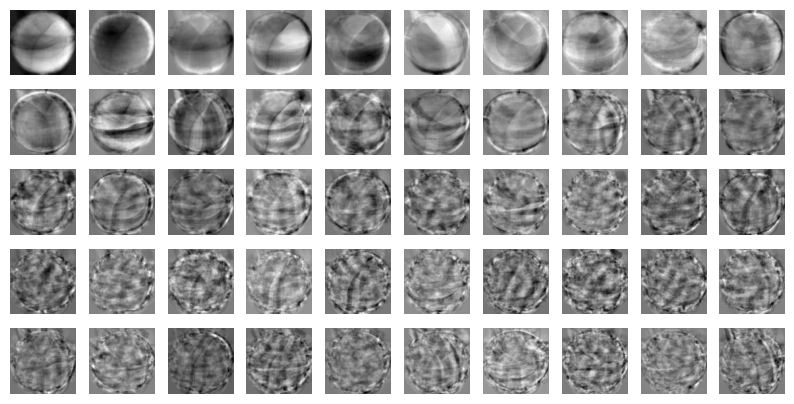

In [ ]:
# 주성분을 100 * 100 크기의 이미지처럼 출력 해보기

# 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력하는 함수
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1) :
  n = len(arr) # 샘플 개수
  rows = int(np.ceil(n / 10)) # 한 줄에 10개 씩 이미지 그림
  cols = n if rows < 2 else 10 # 행이 1개면 열의 개수 == 샘플 개수, 아니면 열의 개수 == 10

  fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)

  for i in range(rows) :
    for j in range(cols) :
      if i * 10 + j < n :
        axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
        axs[i, j].axis('off')
  plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것임<br>
데이터셋에 있는 어떤 특징을 잡아낸 것으로 생각 가능<br>
<br>
주성분을 찾았으니 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있음<br>
원본 데이터를 주성분으로 분해한다고 생각 가능

In [ ]:
# 원본 데이터의 차원 줄이기
print(f"줄이기 전 : {fruits_2d.shape}")

fruits_pca = pca.transform(fruits_2d)
print(f"줄이고 난 후 : {fruits_pca.shape}")


줄이기 전 : (300, 10000)
줄이고 난 후 : (300, 50)


In [ ]:
# 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


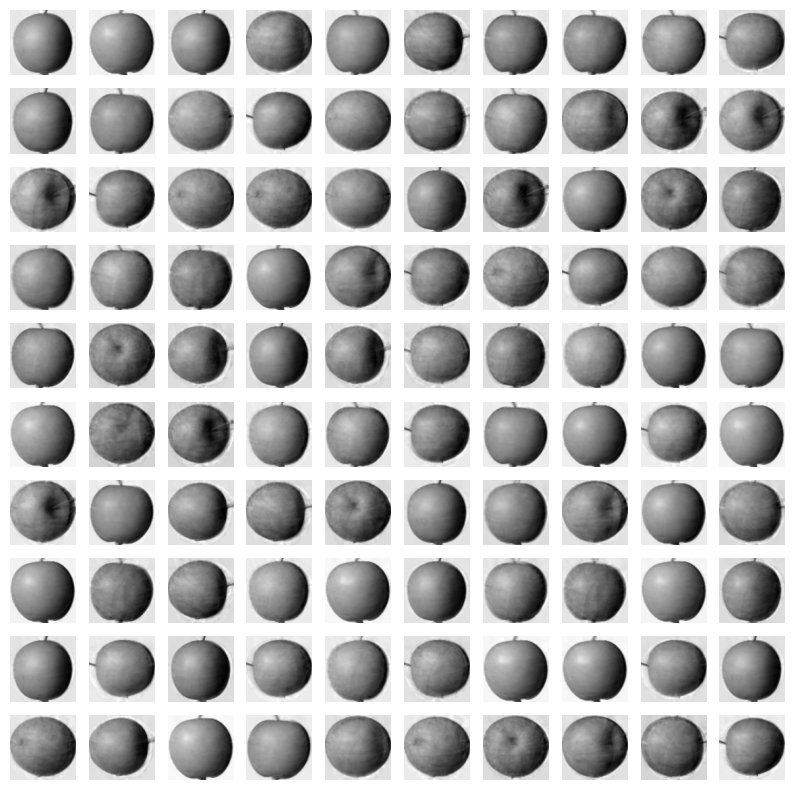

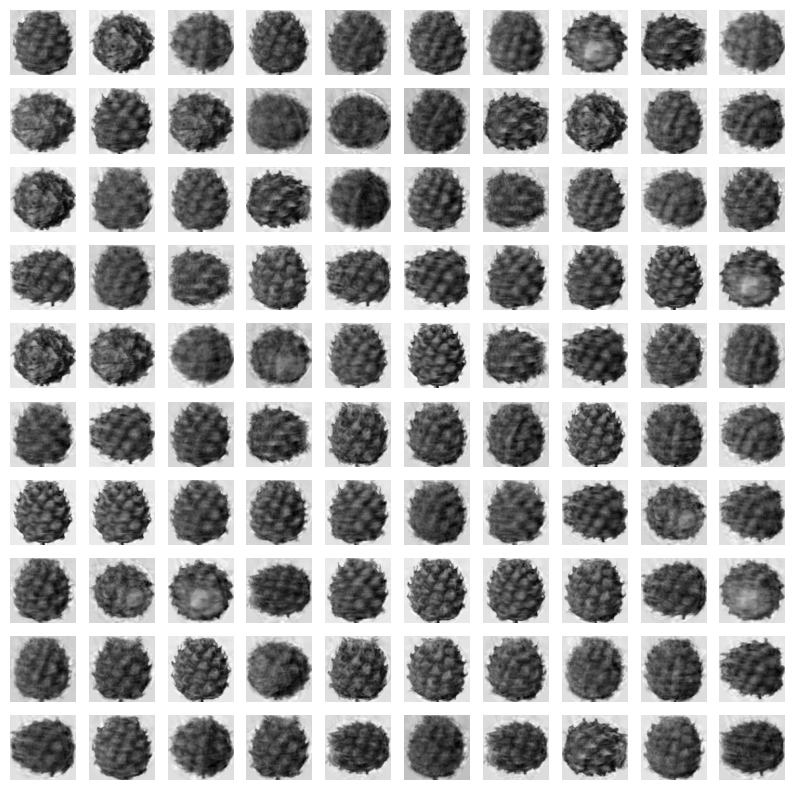

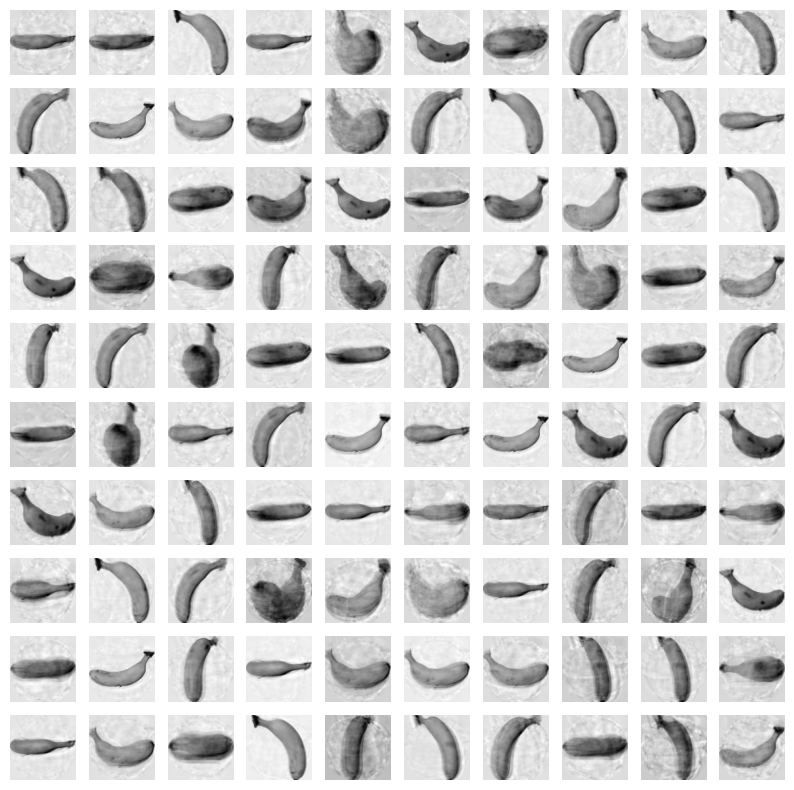

In [ ]:
# 재구성한 이미지 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200] :
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

## 설명된 분산
위에서 과일 이미지가 잘 복원이 되었음<br>
일부 흐리고 번진 부분도 있지만, 50개의 특성을 10000개로 늘린 것 치고는 잘 됨<br>
주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성 할 수 있었을 건데, 위에서 사용한 50개의 특성은 얼마나 분산을 잘 보존하는 걸까?<br>
<br>
설명된 분산(Explained Variance) : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값<br>


In [ ]:
# explained_variance_ratio_ : 각 주성분의 설명된 분산 비율이 기록되어 있음
# 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음
print(np.sum(pca.explained_variance_ratio_))

0.9216193416752022


92%가 넘는 분산을 유지하고 있음<br>
<br>
설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는 데 도움이 됨

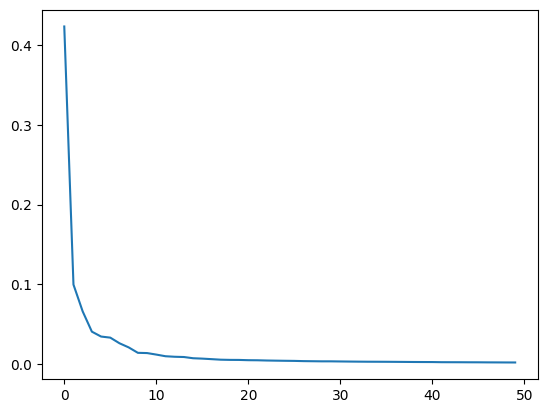

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

10개의 주성분이 대부분의 분산을 표현, 10개 이후로는 설명하고 있는 분산이 비교적 작은 것을 확인할 수 있음

## 다양한 알고리즘과 함께 사용

### 로지스틱 회귀 모델

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # 로지스틱 회귀 모델 생성

In [ ]:
# 지도 학습이니 target값이 있어야함
# 사과 - 0, 파인애플 - 1, 바나나 - 2
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
# 원본 데이터 사용
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.7154028415679932


In [ ]:
# PCA로 축소한 데이터 사용
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.061232805252075195


50개의 특성만 사용했는데 정확도가 100%, 시간은 3배 이상 감소함<br>
PCA로 훈련 데이터의 차원을 축소하면 저장 공간 뿐 아니라 모델의 훈련 속도도 높일 수 있음<br>
<br>
PCA 클래스 사용시 n_components 매개변수에 주성분의 개수를 지정했었음<br>
이거 대신 원하는 설명된 분산의 비율을 입력할 수도 있음<br>
PCA 클래스는 지정된 비율에 도달할 때 까지 자동으로 주성분을 찾음

In [ ]:
# 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 훈련
pca = PCA(0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
# 몇 개의 주성분을 찾았는지 확인
print(pca.n_components_)

2


특성 2개로 원본 데이터에 있는 분산의 50%를 표현할 수 있음


In [ ]:
# 주성분이 2개인 모델로 원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
# 2개의 특성만 사용해서 교차검증 해보기
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9933333333333334
0.058423423767089845


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


특성 2개로 99%의 정확도를 달성함

In [ ]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


fruits_pca로 찾은 클러스터는 각각 110개, 99개, 91개의 샘플을 포함하고 있음

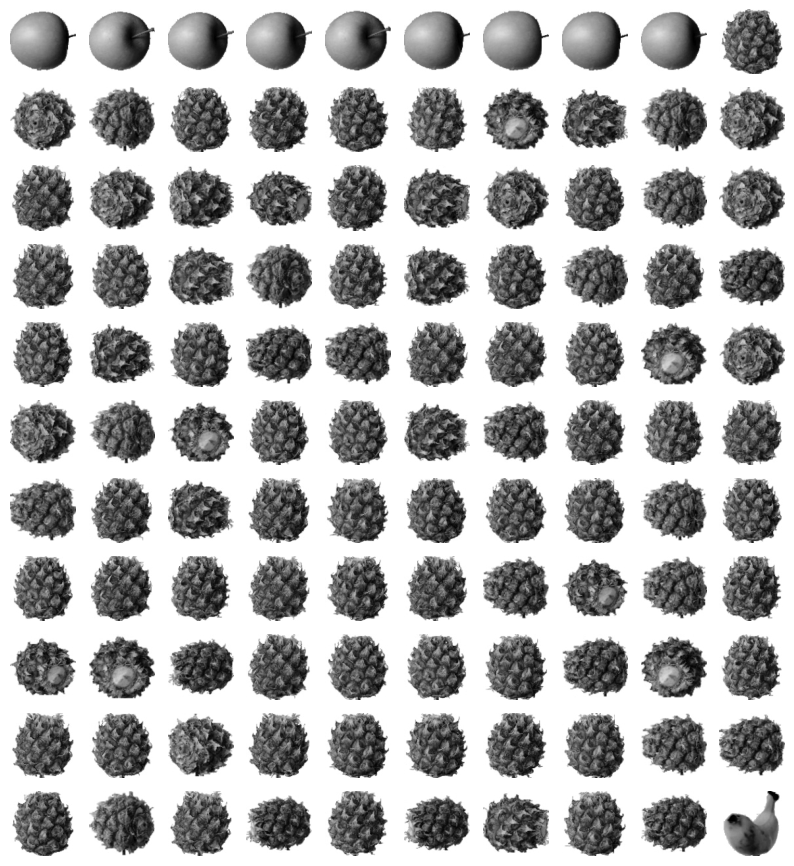

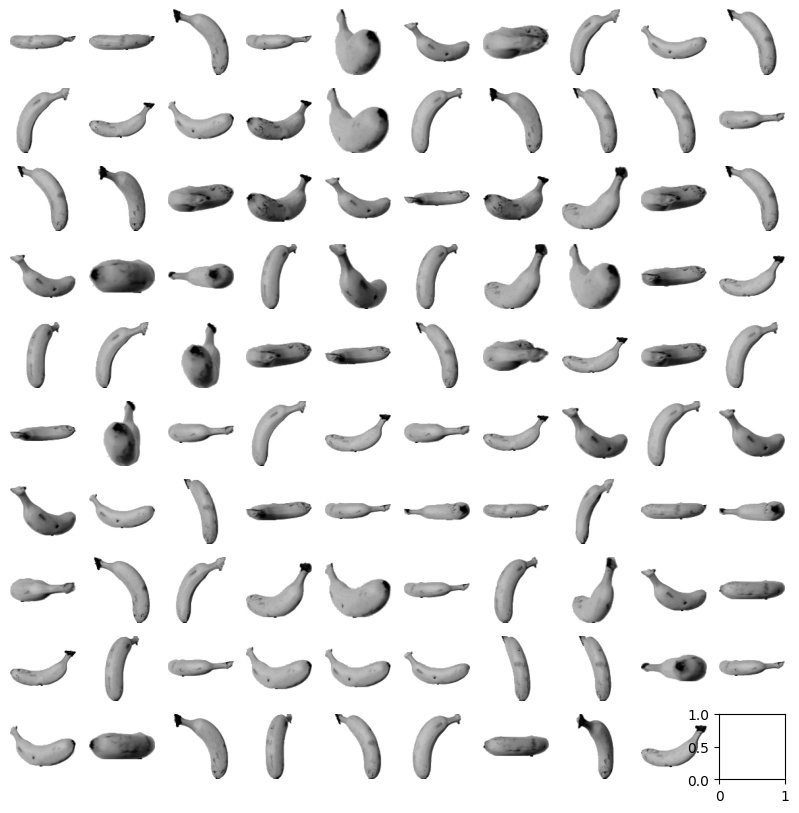

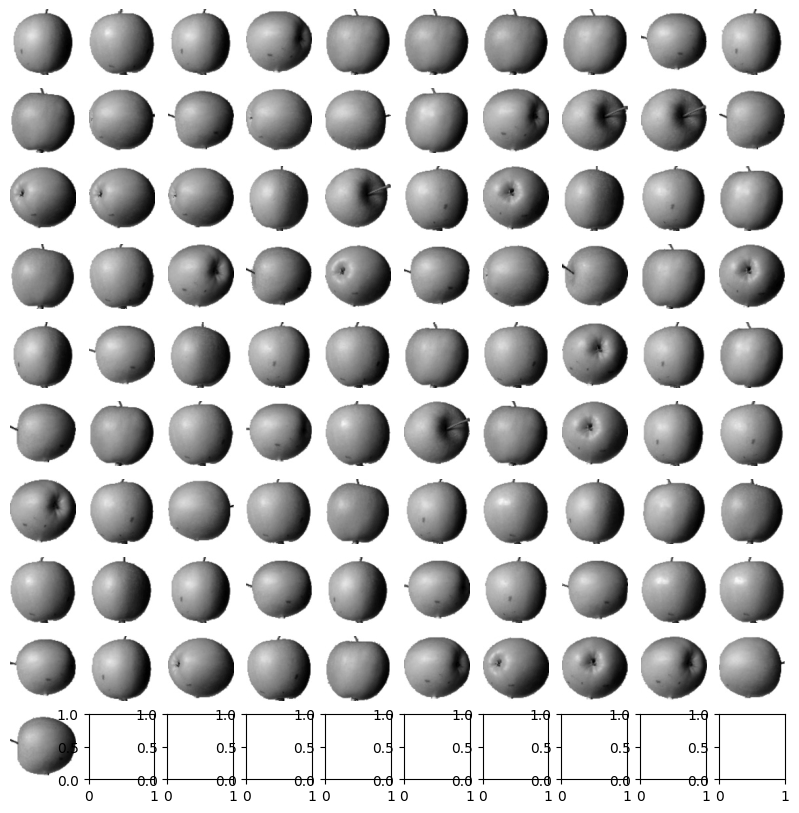

In [ ]:
# KMeans가 찾은 레이블을 사용해 과일 이미지 출력
for label in range(0, 3) :
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

파인애플과 사과가 조금 혼돈되는 면이 있음<br>
<br>
훈련 데이터의 차원을 줄이면 좋은점 중 하나는 시각화임<br>
3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬워짐<br>
fruits_pca 데이터는 2개의 특성이 있기 때문에, 2차원으로 표현할 수 있음

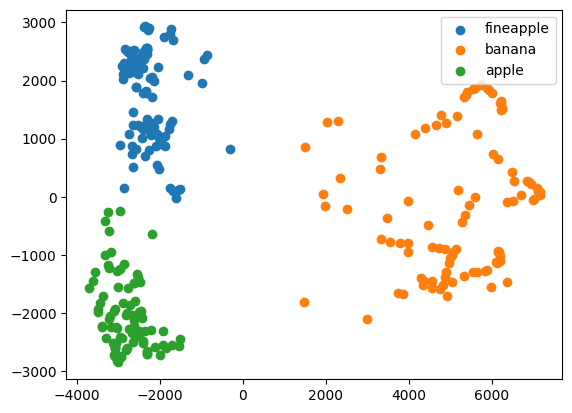

In [ ]:
# km.label_를 사용해 클러스터별로 나누어 산점도 그리기
for label in range(0, 3) :
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['fineapple', 'banana', 'apple'])
plt.show()

클러스터의 산점도를 봤을 때 꽤나 잘 분류된 것을 알 수 있음